In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
train = pd.read_excel('train_Data.xlsx')
train.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


In [97]:
train.shape

(128655, 26)

In [98]:
train.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 26 columns):
ID                 128655 non-null int64
Frequency          128655 non-null object
InstlmentMode      128655 non-null object
LoanStatus         128655 non-null object
PaymentMode        128655 non-null object
BranchID           128655 non-null int64
Area               117002 non-null object
Tenure             128655 non-null int64
AssetCost          128655 non-null int64
AmountFinance      128655 non-null float64
DisbursalAmount    128655 non-null float64
EMI                128655 non-null float64
DisbursalDate      128655 non-null datetime64[ns]
MaturityDAte       128654 non-null datetime64[ns]
AuthDate           128655 non-null datetime64[ns]
AssetID            128655 non-null int64
ManufacturerID     128655 non-null int64
SupplierID         128655 non-null int64
LTV                128655 non-null float64
SEX                128596 non-null object
AGE                128596 no

In [100]:
train['Top-up Month'].value_counts()

No Top-up Service    106677
 > 48 Months           8366
36-48 Months           3656
24-30 Months           3492
30-36 Months           3062
18-24 Months           2368
12-18 Months           1034
Name: Top-up Month, dtype: int64

In [101]:
train.duplicated().sum()

0

In [102]:
test = pd.read_excel('test_Data.xlsx')
test.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE
0,4,Monthly,Advance,Closed,PDC_E,2,GUNA,46,480000,365000.0,...,3524747,1046.0,22354,75.83,M,50.0,32069.00,GUNA,MADHYA PRADESH,473001.0
1,5,Monthly,Advance,Closed,PDC,2,GUNA,45,480000,285000.0,...,4985862,1046.0,22354,57.44,M,35.0,25000.00,GUNA,MADHYA PRADESH,473001.0
2,6,Quatrly,Arrear,Closed,PDC,2,GUNA,48,580000,400000.0,...,12881783,1060.0,65929,68.97,M,37.0,23333.33,GUNA,MADHYA PRADESH,473001.0
3,25,Half Yearly,Arrear,Closed,Billed,154,NaN,36,725000,500000.0,...,10613776,1049.0,68597,61.79,M,55.0,91666.67,MAHASAMUND,CHATTISGARH,493558.0
4,119,Quatrly,Arrear,Closed,PDC,194,CUTTACK,48,617000,400000.0,...,7911110,1049.0,38493,59.09,M,48.0,12500.00,JAGATSINGHAPUR,ORISSA,754137.0


In [103]:
test.shape

(14745, 25)

In [104]:
test.isnull().sum()

ID                   0
Frequency            0
InstlmentMode        0
LoanStatus           0
PaymentMode          0
BranchID             0
Area               546
Tenure               0
AssetCost            0
AmountFinance        0
DisbursalAmount      0
EMI                  0
DisbursalDate        0
MaturityDAte         0
AuthDate             0
AssetID              0
ManufacturerID       2
SupplierID           0
LTV                  0
SEX                  5
AGE                  7
MonthlyIncome       14
City                 0
State                0
ZiPCODE              1
dtype: int64

In [105]:
newtrain = train
newtest = test

In [106]:
newtrain = newtrain.drop(['Area', 'ID', 'City', 'ZiPCODE', 'State'], axis = 1)
newtest = newtest.drop(['Area', 'ID', 'City', 'ZiPCODE', 'State'], axis = 1)

In [107]:
newtest['SEX'] = newtest['SEX'].fillna(newtest['SEX'].value_counts().index[0])
newtest['SEX'].value_counts()

M    14134
F      611
Name: SEX, dtype: int64

In [108]:
newtrain['SEX'] = newtrain['SEX'].fillna(newtrain['SEX'].value_counts().index[0])
newtrain['SEX'].value_counts()

M    122203
F      6452
Name: SEX, dtype: int64

In [109]:
newtrain['AGE'] = newtrain['AGE'].fillna(newtrain['AGE'].mean())
newtest['AGE'] = newtest['AGE'].fillna(newtest['AGE'].mean())

In [110]:
newtrain['MonthlyIncome'] = newtrain['MonthlyIncome'].fillna(newtrain['MonthlyIncome'].mean())
newtest['MonthlyIncome'] = newtest['MonthlyIncome'].fillna(newtest['MonthlyIncome'].mean())

In [111]:
newtrain = newtrain.dropna()

In [112]:
newtest['ManufacturerID'] = newtest['ManufacturerID'].fillna(newtest['ManufacturerID'].mean())

In [113]:
newtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128654 entries, 0 to 128654
Data columns (total 21 columns):
Frequency          128654 non-null object
InstlmentMode      128654 non-null object
LoanStatus         128654 non-null object
PaymentMode        128654 non-null object
BranchID           128654 non-null int64
Tenure             128654 non-null int64
AssetCost          128654 non-null int64
AmountFinance      128654 non-null float64
DisbursalAmount    128654 non-null float64
EMI                128654 non-null float64
DisbursalDate      128654 non-null datetime64[ns]
MaturityDAte       128654 non-null datetime64[ns]
AuthDate           128654 non-null datetime64[ns]
AssetID            128654 non-null int64
ManufacturerID     128654 non-null int64
SupplierID         128654 non-null int64
LTV                128654 non-null float64
SEX                128654 non-null object
AGE                128654 non-null float64
MonthlyIncome      128654 non-null float64
Top-up Month       128654

In [114]:
import datetime as dt
newtrain['Disbursal_Date'] = newtrain['DisbursalDate'].dt.day
newtrain['Disbursal_Month'] = newtrain['DisbursalDate'].dt.month
newtrain['Disbursal_Year'] = newtrain['DisbursalDate'].dt.year

In [115]:
newtrain['Maturity_Date'] = newtrain['MaturityDAte'].dt.day
newtrain['Maturity_Month'] = newtrain['MaturityDAte'].dt.month
newtrain['Maturity_Year'] = newtrain['MaturityDAte'].dt.year

In [116]:
newtrain['Auth_Date'] = newtrain['AuthDate'].dt.day
newtrain['Auth_Month'] = newtrain['AuthDate'].dt.month
newtrain['Auth_Year'] = newtrain['AuthDate'].dt.year

In [117]:
newtest['Disbursal_Date'] = newtest['DisbursalDate'].dt.day
newtest['Disbursal_Month'] = newtest['DisbursalDate'].dt.month
newtest['Disbursal_Year'] = newtest['DisbursalDate'].dt.year

In [118]:
newtest['Maturity_Date'] = newtest['MaturityDAte'].dt.day
newtest['Maturity_Month'] = newtest['MaturityDAte'].dt.month
newtest['Maturity_Year'] = newtest['MaturityDAte'].dt.year

In [119]:
newtest['Auth_Date'] = newtest['AuthDate'].dt.day
newtest['Auth_Month'] = newtest['AuthDate'].dt.month
newtest['Auth_Year'] = newtest['AuthDate'].dt.year

In [120]:
newtrain = newtrain.drop(['DisbursalDate', 'MaturityDAte', 'AuthDate'], axis = 1)
newtest = newtest.drop(['DisbursalDate', 'MaturityDAte', 'AuthDate'], axis = 1)

In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [122]:
category = ['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'SEX']
for i in category:
    newtrain[i] = le.fit_transform(newtrain[i])

In [123]:
for i in category:
    newtest[i] = le.fit_transform(newtest[i])

In [124]:
newtrain['Top-up Month'] = le.fit_transform(newtrain['Top-up Month'])

In [125]:
x = newtrain.drop('Top-up Month', axis = 1)
y = newtrain['Top-up Month']

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [127]:
from sklearn.metrics import accuracy_score

In [128]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8315261746531422


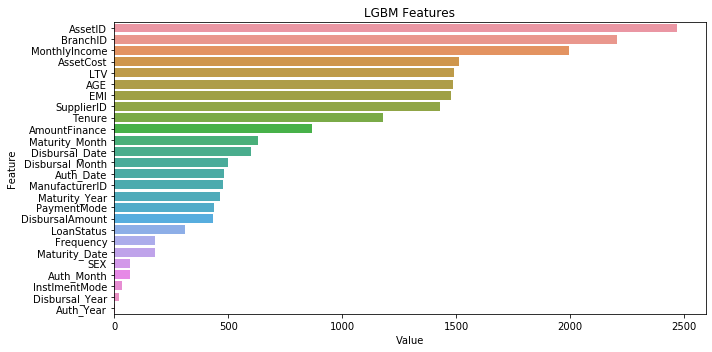

In [129]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features')
plt.tight_layout()
plt.show()

In [85]:
x = newtrain.drop(['Top-up Month', 'Auth_Year'], axis = 1)
y = newtrain['Top-up Month']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8282203818188888


In [86]:
x = newtrain.drop('Top-up Month', axis = 1)
y = newtrain['Top-up Month']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
y_pred = rf.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.827326101325868


In [132]:
x_train = newtrain.drop('Top-up Month', axis = 1)
y_train = newtrain['Top-up Month']
x_test = newtest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
y_pred = rf.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'ID': test.ID, 'Top-up Month': le.inverse_transform(y_pred)})
solution.to_csv('Solution.csv', index = False)